In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

/home/yoogesh/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/yoogesh/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [3]:
dataset = pd.read_csv("/home/yoogesh/Desktop/covid19/data/train.csv")

In [4]:
dataset

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0
5,6,NaN,Afghanistan,2020-01-27,0.0,0.0
6,7,NaN,Afghanistan,2020-01-28,0.0,0.0
7,8,NaN,Afghanistan,2020-01-29,0.0,0.0
8,9,NaN,Afghanistan,2020-01-30,0.0,0.0
9,10,NaN,Afghanistan,2020-01-31,0.0,0.0


In [5]:
dataset.shape

(23256, 6)

In [8]:
dataset.head(5)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [9]:
dataset.tail(10)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
23246,32702,NaN,Zimbabwe,2020-03-28,7.0,1.0
23247,32703,NaN,Zimbabwe,2020-03-29,7.0,1.0
23248,32704,NaN,Zimbabwe,2020-03-30,7.0,1.0
23249,32705,NaN,Zimbabwe,2020-03-31,8.0,1.0
23250,32706,NaN,Zimbabwe,2020-04-01,8.0,1.0
23251,32707,NaN,Zimbabwe,2020-04-02,9.0,1.0
23252,32708,NaN,Zimbabwe,2020-04-03,9.0,1.0
23253,32709,NaN,Zimbabwe,2020-04-04,9.0,1.0
23254,32710,NaN,Zimbabwe,2020-04-05,9.0,1.0
23255,32711,NaN,Zimbabwe,2020-04-06,10.0,1.0


In [10]:
dataset.describe()

,Id,ConfirmedCases,Fatalities
count,23256.000000,23256.000000,23256.000000
mean,16356.000000,750.543946,34.440746
std,9451.979462,6008.725072,438.508692
min,1.000000,0.000000,0.000000
25%,8170.750000,0.000000,0.000000
50%,16356.000000,0.000000,0.000000
75%,24541.250000,67.000000,0.000000
max,32711.000000,136675.000000,16523.000000


In [11]:
#plotting the dataset to check for relationships
import seaborn as seaplot

/home/yoogesh/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


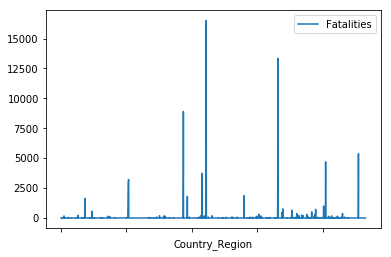

In [14]:
dataset.plot("Country_Region", "Fatalities")

In [17]:
X = dataset["ConfirmedCases"].values.reshape(-1, 1)
Y = dataset["Fatalities"].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [18]:
regression = LinearRegression()
regression.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
print(regression.intercept_)
print(regression.coef_)

[-13.12911768]
[[0.06353129]]


In [21]:
y_pred = regression.predict(X_test)

In [22]:
df = pd.DataFrame({'ACTUAL' : Y_test.flatten(), 'Predicted': y_pred.flatten()})

In [23]:
df

,ACTUAL,Predicted
0,0.0,-13.129118
1,20.0,67.682688
2,0.0,-13.129118
3,0.0,-13.129118
4,0.0,-12.874993
5,0.0,-13.129118
6,36.0,26.069690
7,0.0,-13.129118
8,7.0,1.292486
9,5.0,19.208311


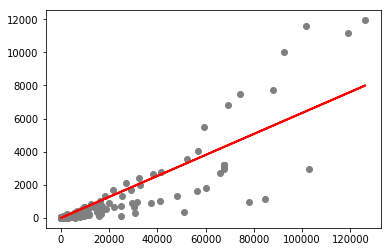

In [24]:
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [25]:
# Evaluating the performance of teh algorithms 

print('Mean Absolute Error - ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error - ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Absolute Error - ', np.sqrt(metrics.mean_absolute_error(Y_test, y_pred)))

Mean Absolute Error -  33.62172130513231
Mean Squared Error -  42649.6793281014
Root Mean Absolute Error -  5.798424036333692
